# Training dataset: Stereo-Seq

ONT dataset generated from two flow cells using cDNA from Stereo-Seq library (R.Bamford, E.Hendy - April 2025)
1. Mouse with no TSO enrichment
2. Mouse with TSO enrichment (note this flow cell had much lower sequencing depth)

Datasets analysed through LRPipeline

## Set-up

In [1]:
# packages
suppressWarnings(suppressMessages(library("data.table")))
suppressWarnings(suppressMessages(library("dplyr")))
suppressWarnings(suppressMessages(library("ggplot2")))
suppressWarnings(suppressMessages(library("cowplot")))
options(repr.plot.width = 12, repr.plot.height = 6)

# paths
dir <- c("C:/Users/sl693/OneDrive - University of Exeter/ExeterPostDoc/1_Projects/BRC/5_Analysis/mouse_training/")
LOGEN <- c("C:/Users/sl693/OneDrive - University of Exeter/ExeterPostDoc/2_Scripts/LOGen/")
source(paste0(LOGEN, "compare_datasets/dataset_identifer.R"))
source(paste0(LOGEN, "transcriptome_stats/read_sq_classification.R"))
source(paste0(LOGEN, "transcriptome_stats/summarise_classfiles.R"))

## Load files

In [2]:
# read in expression
counts <- fread(paste0(dir,"demux_fl_count.csv"), data.table = F) 
nreadsnsamples <- counts %>% tibble::column_to_rownames(., var = "id") %>% 
  mutate(nsamples = rowSums(.!=0), nreads = rowSums(.)) %>% 
  select(nsamples, nreads)

In [3]:
# read in sqanti classification file
class.files <- SQANTI_class_preparation(paste0(dir,"StereoSeqTraining_collapsed_RulesFilter_result_classification.txt"), "ns")

Loading classification file: C:/Users/sl693/OneDrive - University of Exeter/ExeterPostDoc/1_Projects/BRC/5_Analysis/mouse_training/StereoSeqTraining_collapsed_RulesFilter_result_classification.txt 
Processing SQANTI classification file generated from new version (5.0) onwards
Removing artifacts


In [4]:
# merge expression with class.files
class.files <- merge(class.files, counts, by.x = "isoform", by.y = "id", all.x = T)
class.files <- merge(class.files, nreadsnsamples, by.x = "isoform", by.y = 0, all.x = T)

# create dataset column
class.files$dataset <- apply(class.files, 1, function(x) identify_dataset_by_counts (x[["mouse_TSO_mapped_filtered"]], x[["mouse_mapped_filtered"]], "TSO","non_TSO"))


### Length
Exploring the length distribution of transcripts detected in both or unique to the flow cell

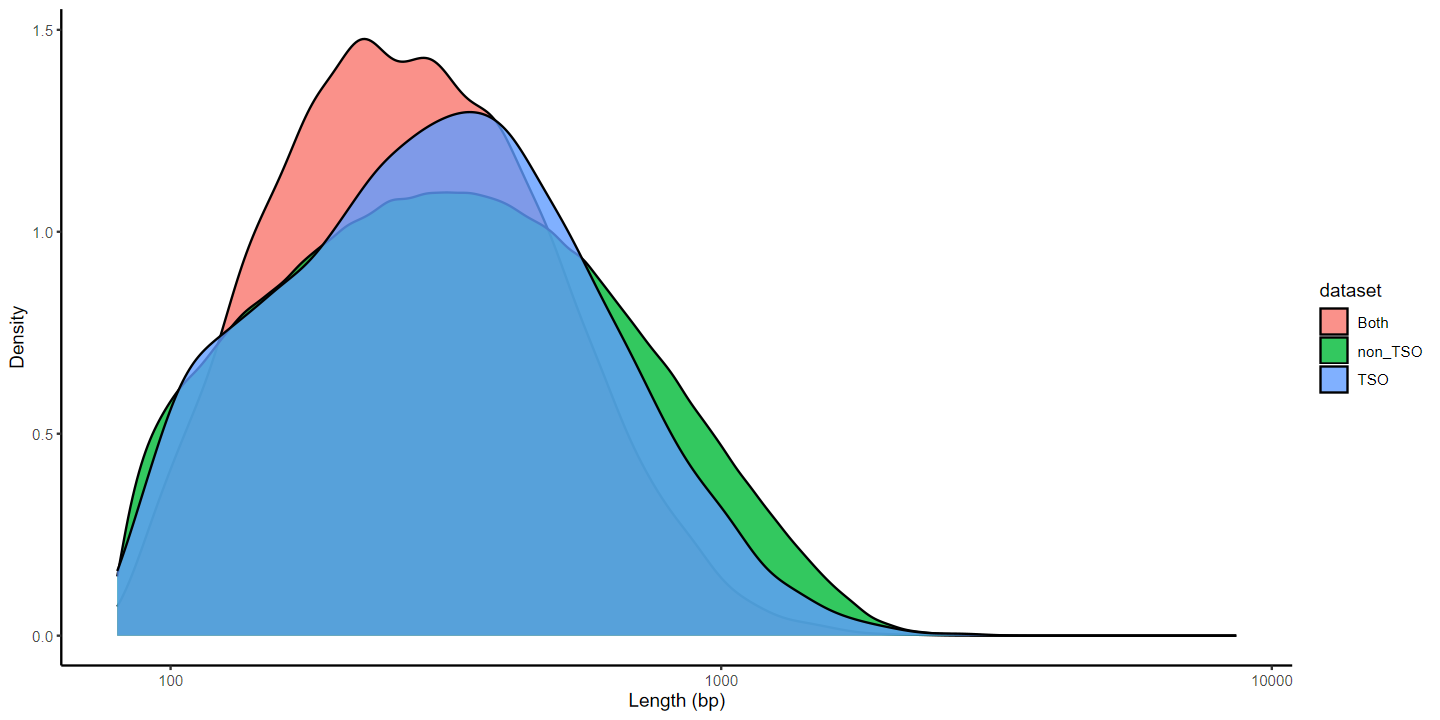

In [5]:
ggplot(class.files, aes(x = length, fill = dataset)) + geom_density(alpha = 0.8) + 
scale_x_continuous(trans='log10') + theme_classic() + 
labs(x = "Length (bp)", y = "Density")

Length distribution of transcipts in (A) TSO enriched transcriptome, (B) non-TSO enriched transcriptome

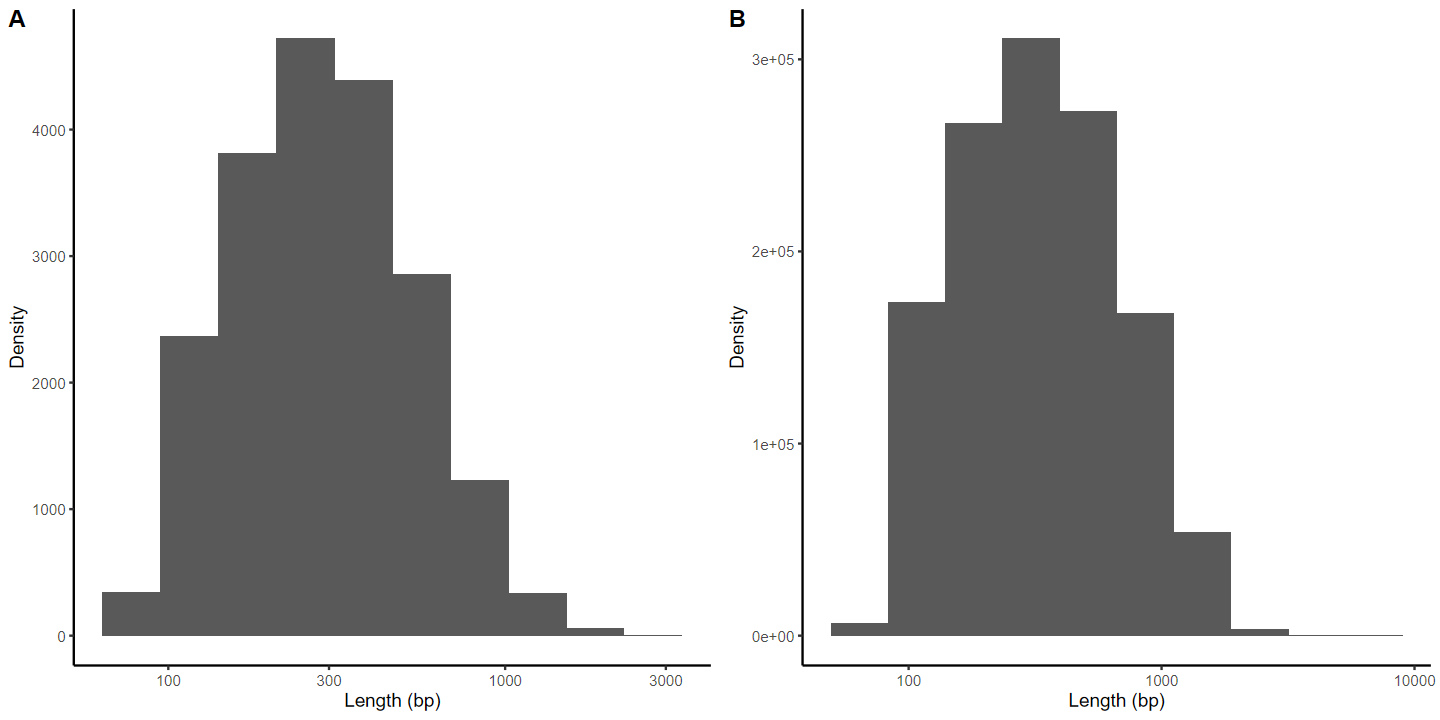

In [6]:
TSO <- class.files[class.files$mouse_TSO_mapped_filtered > 0,]
nonTSO <- class.files[class.files$mouse_mapped_filtered > 0,]
p1 <- ggplot(TSO, aes(x = length)) + geom_histogram(bins=10)  + scale_x_continuous(trans='log10') + theme_classic() + labs(x = "Length (bp)", y = "Density")
p2 <- ggplot(nonTSO, aes(x = length)) + geom_histogram(bins=10)  + scale_x_continuous(trans='log10') + theme_classic() + labs(x = "Length (bp)", y = "Density")
plot_grid(p1,p2, labels = c("A","B"))

### Summary dataset

Worringly, there are more transcripts classifed as genic_intron, ISM, antisense, intergnic than FSM transcripts

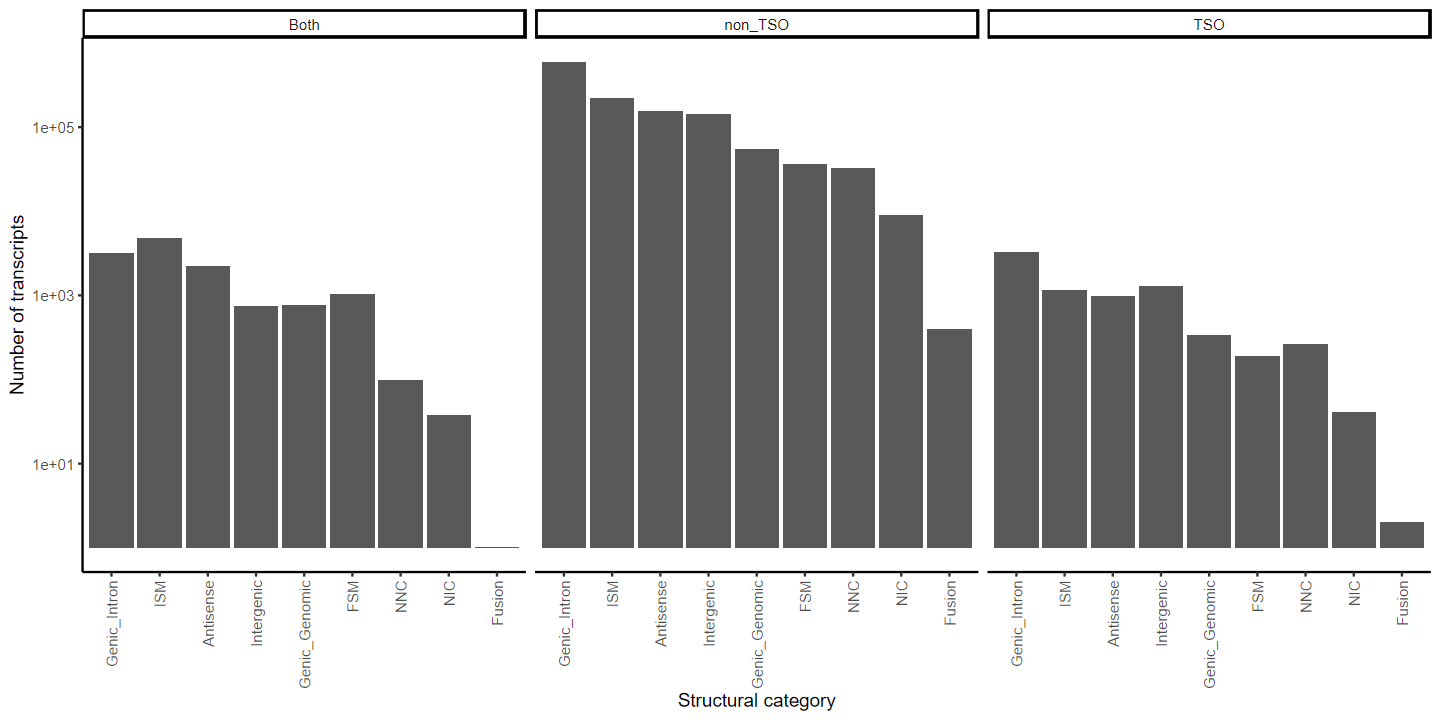

In [7]:
class.files %>% group_by(structural_category, dataset) %>% 
  tally() %>%
  ggplot(., aes(x = reorder(structural_category,-n), y = n)) + geom_bar(stat = "identity") + facet_grid(~dataset) +
  scale_y_continuous(trans='log10') +
  theme_classic() + 
  labs(x = "Structural category", y = "Number of transcripts") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) 

In [8]:
descriptives_summary(TSO)

,Value
,<chr>
Total.Genes,15586
Total.Transcripts,20107
Mono.exonic.Transcripts,1035821 (82.09%)
Multi.exonic.Transcripts,225926 (17.91%)
Transcripts.with.1...2.reads,1062385 (84.2%)
Transcripts.with.10.reads.or.more,362094 (28.7%)
Annotated.Genes,4990
Total.Transcripts.to.Annotated.Genes,8577
Mean.Transcript.Length,375.88 (sd = 250.79)


In [9]:
descriptives_summary(nonTSO)

,Value
,<chr>
Total.Genes,780957
Total.Transcripts,1254299
Mono.exonic.Transcripts,1035821 (82.09%)
Multi.exonic.Transcripts,225926 (17.91%)
Transcripts.with.1...2.reads,1062385 (84.2%)
Transcripts.with.10.reads.or.more,362094 (28.7%)
Annotated.Genes,23353
Total.Transcripts.to.Annotated.Genes,358357
Mean.Transcript.Length,503.5 (sd = 383.06)
